# LAB | Intro to Machine Learning

**Load the data**

In this challenge, we will be working with Spaceship Titanic data. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [68]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [48]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [49]:
#your code here
spaceship.shape

(8693, 14)

**Check for data types**

In [50]:
#your code here
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [51]:
#your code here
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [53]:
#your code here
spaceship.dropna()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [55]:
spaceship.dropna(subset=['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], inplace=True)

In [56]:
spaceship.head(6)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True


**KNN**

K Nearest Neighbors is a distance based algorithm, and requeries all **input data to be numerical.**

Let's only select numerical columns as our features.

In [57]:
#your code here


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 6764, dtype: bool

In [59]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [62]:
X_test.head(3)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
3476,29.0,0.0,0.0,0.0,0.0,0.0
2602,31.0,0.0,0.0,0.0,0.0,0.0
5359,20.0,0.0,0.0,0.0,0.0,0.0


In [63]:
knn.predict(X_test)

array([ True,  True,  True, ..., False,  True, False])

In [64]:
y_test.values

array([ True, False,  True, ..., False,  True, False])

In [65]:
knn.score(X_test, y_test)

0.770140428677014

And also lets define our target.

**Train Test Split**

Now that we have split the data into **features** and **target** variables and imported the **train_test_split** function, split X and y into X_train, X_test, y_train, and y_test. 80% of the data should be in the training set and 20% in the test set.

In [72]:
#your code here
from sklearn.model_selection import train_test_split
features = spaceship.drop(columns=["Transported","PassengerId","HomePlanet","CryoSleep","Cabin","Destination","VIP","Name"]) # Características
target = spaceship["Transported"]  # Rótulos
display(features)
target

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 6764, dtype: bool

In [73]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 0)
display(X_train)
y_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
6201,38.0,0.0,201.0,0.0,1308.0,4085.0
6106,38.0,0.0,0.0,0.0,0.0,0.0
7095,39.0,0.0,0.0,0.0,0.0,0.0
3060,0.0,0.0,0.0,0.0,0.0,0.0
4101,42.0,954.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
6362,48.0,0.0,0.0,0.0,0.0,0.0
4216,46.0,0.0,0.0,0.0,0.0,0.0
2153,27.0,0.0,12077.0,0.0,75.0,0.0
3385,46.0,105.0,335.0,0.0,72.0,388.0


6201    False
6106     True
7095     True
3060     True
4101    False
        ...  
6362     True
4216     True
2153     True
3385    False
3551    False
Name: Transported, Length: 5411, dtype: bool

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

You need to choose between **Classificator** or **Regressor**. Take into consideration target variable to decide.

Initialize a KNN instance without setting any hyperparameter.

In [76]:
#your code here
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)

Fit the model to your data.

In [77]:
#your code here
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

Evaluate your model.

In [79]:
#your code here

knn.predict(X_test)




array([1. , 0.9, 0.8, ..., 0. , 1. , 0.3])

In [80]:
y_test.values

array([ True, False,  True, ..., False,  True, False])

In [81]:
knn.score(X_test, y_test)

0.3794549070168921

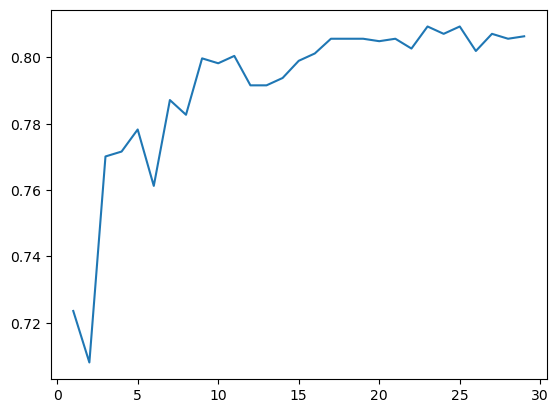

In [82]:
scores = []
k = np.arange(1,30)

for i in k:
  knn_c = KNeighborsClassifier(n_neighbors=i)
  knn_c.fit(X_train, y_train)

  test_score = knn_c.score(X_test, y_test)
  scores.append(test_score)

plt.plot(k, scores)
plt.show()

In [83]:
#Root Mean Squared Error will allow to say by how much on average does my model fails
from sklearn.metrics import mean_squared_error, mean_absolute_error

my_pred = knn.predict(X_test)

mean_squared_error(y_test, my_pred, squared = False)

0.39385524145237955

In [84]:
mean_absolute_error(y_test, my_pred)

0.29445676274944566

**Congratulations, you have just developed your first Machine Learning model!**